# Pandas Data Operations

This notebook demonstrates how to use pandas to perform common data operations:

1. Reading CSV data into pandas
2. Selecting columns
3. Filtering by value in column
4. Performing aggregations
5. Filtering on aggregations
6. Left outer joins
7. Right outer joins
8. Inner joins

Let's start by importing pandas and other libraries we'll need.

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Reading dictonary Data into Pandas

First, let's create two sample datasets that we'll use throughout this notebook. We'll create them as pandas DataFrames and then save them as CSV files. In a real-world scenario, you would typically load existing CSV files.

In [75]:
# Create a sample sales DataFrame
sales_data = {
    'order_id': list(range(1, 11)),
    'customer_id': [101, 102, 101, 103, 104, 105, 103, 106, 102, 107],
    'product_id': [1, 2, 3, 1, 2, 3, 4, 5, 1, 2],
    'quantity': [2, 1, 3, 2, 1, 1, 4, 2, 3, 1],
    'price': [25.50, 35.00, 15.75, 25.50, 35.00, 15.75, 10.25, 50.00, 25.50, 35.00],
    'order_date': ['2023-01-15', '2023-01-16', '2023-01-16', '2023-01-17', '2023-01-18', 
                   '2023-01-19', '2023-01-20', '2023-01-20', '2023-01-21', '2023-01-22'],
    'category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Clothing', 
                'Books', 'Food', 'Furniture', 'Electronics', 'Clothing']
}

sales_df = pd.DataFrame(sales_data)

# Create a sample customers DataFrame
customers_data = {
    'customer_id': [101, 102, 103, 104, 105, 108, 109],  # Note: 106, 107 missing and 108, 109 not in sales
    'name': ['Alice Brown', 'Bob Smith', 'Charlie Davis', 'David Wilson', 'Emma Johnson', 'Frank Miller', 'Grace Lee'],
    'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 
             'emma@example.com', 'frank@example.com', 'grace@example.com'],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio'],
    'membership_level': ['Gold', 'Silver', 'Gold', 'Bronze', 'Silver', 'Gold', 'Bronze']
}

customers_df = pd.DataFrame(customers_data)

# Save DataFrames to CSV files
sales_df.to_csv('sales.csv', index=False)
customers_df.to_csv('customers.csv', index=False)

# Now read the CSV files back into pandas to simulate loading from CSV
sales_df = pd.read_csv('sales.csv')
customers_df = pd.read_csv('customers.csv')

# Display the first few rows of each DataFrame
print("Sales DataFrame:")
sales_df.head()

Sales DataFrame:


,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.50,2023-01-15,Electronics
1,2,102,2,1,35.00,2023-01-16,Clothing
2,3,101,3,3,15.75,2023-01-16,Books
3,4,103,1,2,25.50,2023-01-17,Electronics
4,5,104,2,1,35.00,2023-01-18,Clothing


In [76]:
sales_df = pd.read_csv('sales.csv')
customers_df = pd.read_csv('customers.csv')

# # Display the first few rows of each DataFrame
print("Sales DataFrame:")
sales_df.head()

Sales DataFrame:


,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.50,2023-01-15,Electronics
1,2,102,2,1,35.00,2023-01-16,Clothing
2,3,101,3,3,15.75,2023-01-16,Books
3,4,103,1,2,25.50,2023-01-17,Electronics
4,5,104,2,1,35.00,2023-01-18,Clothing


In [77]:
print("Customers DataFrame:")
customers_df.sample(n=3)

Customers DataFrame:


,customer_id,name,email,city,membership_level
2,103,Charlie Davis,charlie@example.com,Chicago,Gold
3,104,David Wilson,david@example.com,Houston,Bronze
1,102,Bob Smith,bob@example.com,Los Angeles,Silver


## 2. Selecting Columns

Pandas provides multiple ways to select columns from a DataFrame. Let's explore some of these methods.

In [78]:
# Method 1: Select a single column (returns a Series)
customer_id_column = customers_df['email']
print("Single column selection (returns a Series):")
print(customer_id_column)
# set(customer_id_column)

Single column selection (returns a Series):
0      alice@example.com
1        bob@example.com
2    charlie@example.com
3      david@example.com
4       emma@example.com
5      frank@example.com
6      grace@example.com
Name: email, dtype: object


In [79]:
# Method 2: Select multiple columns (returns a DataFrame)
selected_columns = sales_df[['order_id', 'customer_id', 'product_id', 'price']]

list_of_columns=['order_id', 'customer_id', 'product_id', 'price']
selected_columns = sales_df[list_of_columns]

print("Multiple column selection:")
selected_columns.head()

Multiple column selection:


,order_id,customer_id,product_id,price
0,1,101,1,25.50
1,2,102,2,35.00
2,3,101,3,15.75
3,4,103,1,25.50
4,5,104,2,35.00


In [80]:
# Method 2: Select multiple columns (returns a DataFrame)
all_columns=list(sales_df.columns)
exclude_columns = ['order_id', 'customer_id', 'product_id', 'price']

list_of_columns=list(set(all_columns)-set(exclude_columns))
print(list_of_columns)

selected_columns = sales_df[list_of_columns]

print("Multiple column selection:")
selected_columns.head()

['order_date', 'category', 'quantity']
Multiple column selection:


,order_date,category,quantity
0,2023-01-15,Electronics,2
1,2023-01-16,Clothing,1
2,2023-01-16,Books,3
3,2023-01-17,Electronics,2
4,2023-01-18,Clothing,1


In [81]:
# Method 3: Using .loc for column selection



loc_selection = sales_df.loc[:, ['category', 'price', 'quantity']]
print("Column selection using .loc:")
loc_selection.head()

Column selection using .loc:


,category,price,quantity
0,Electronics,25.50,2
1,Clothing,35.00,1
2,Books,15.75,3
3,Electronics,25.50,2
4,Clothing,35.00,1


In [82]:
# Method 4: Using .iloc for position-based selection
# Select the first 3 columns for the first 5 rows

iloc_selection = sales_df.iloc[3:5, :]
print("Position-based selection using .iloc:")
iloc_selection

Position-based selection using .iloc:


,order_id,customer_id,product_id,quantity,price,order_date,category
3,4,103,1,2,25.5,2023-01-17,Electronics
4,5,104,2,1,35.0,2023-01-18,Clothing


## 3. Filtering by Value in Column

Pandas makes it easy to filter data based on conditions applied to columns.

In [83]:
sales_df

,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.50,2023-01-15,Electronics
1,2,102,2,1,35.00,2023-01-16,Clothing
2,3,101,3,3,15.75,2023-01-16,Books
3,4,103,1,2,25.50,2023-01-17,Electronics
4,5,104,2,1,35.00,2023-01-18,Clothing
5,6,105,3,1,15.75,2023-01-19,Books
6,7,103,4,4,10.25,2023-01-20,Food
7,8,106,5,2,50.00,2023-01-20,Furniture
8,9,102,1,3,25.50,2023-01-21,Electronics
9,10,107,2,1,35.00,2023-01-22,Clothing


In [84]:
# Filter sales with price greater than 30
high_price_sales = sales_df[sales_df['price'] > 30]
print("High price sales (> $30):")
high_price_sales

High price sales (> $30):


,order_id,customer_id,product_id,quantity,price,order_date,category
1,2,102,2,1,35.0,2023-01-16,Clothing
4,5,104,2,1,35.0,2023-01-18,Clothing
7,8,106,5,2,50.0,2023-01-20,Furniture
9,10,107,2,1,35.0,2023-01-22,Clothing


In [85]:
# Multiple filter conditions (Electronics with quantity > 1)

# electronics_high_qty = sales_df[(sales_df['category'] == 'Electronics') & (sales_df['quantity'] > 1)]

condition1=sales_df['category'] == 'Electronics'
condition2=sales_df['quantity'] > 1


# electronics_high_qty = sales_df[(condition1) | (condition2)]


# print("Electronics with high quantity (> 1):")
# electronics_high_qty

In [86]:
# Filter with multiple values (.isin())
selected_categories = sales_df[sales_df['category'].isin(['Electronics', 'Clothing'])]
print("Electronics and Clothing items:")
selected_categories

Electronics and Clothing items:


,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.5,2023-01-15,Electronics
1,2,102,2,1,35.0,2023-01-16,Clothing
3,4,103,1,2,25.5,2023-01-17,Electronics
4,5,104,2,1,35.0,2023-01-18,Clothing
8,9,102,1,3,25.5,2023-01-21,Electronics
9,10,107,2,1,35.0,2023-01-22,Clothing


In [87]:
# Using string methods for filtering (.str accessor)
e_categories = sales_df[sales_df['category'].str.startswith('E')]
print("Categories starting with 'E':")
e_categories

Categories starting with 'E':


,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.5,2023-01-15,Electronics
3,4,103,1,2,25.5,2023-01-17,Electronics
8,9,102,1,3,25.5,2023-01-21,Electronics


In [88]:
# Using .query() method for more readable syntax
expensive_books = sales_df.query("category == 'Books' and price > 15")
print("Expensive books (price > $15):")
expensive_books

Expensive books (price > $15):


,order_id,customer_id,product_id,quantity,price,order_date,category
2,3,101,3,3,15.75,2023-01-16,Books
5,6,105,3,1,15.75,2023-01-19,Books


## 4. Aggregations

Pandas provides powerful aggregation functions to summarize data.

In [89]:
# Basic aggregations on the entire DataFrame
print("Total sales amount: $", sales_df['price'].sum())
print("Average price: $", sales_df['price'].mean())
print("Maximum quantity:", sales_df['quantity'].max())
print("Minimum price: $", sales_df['price'].min())
print("Total number of orders:", len(sales_df))

Total sales amount: $ 273.25
Average price: $ 27.325
Maximum quantity: 4
Minimum price: $ 10.25
Total number of orders: 10


In [90]:
sales_df.head()

,order_id,customer_id,product_id,quantity,price,order_date,category
0,1,101,1,2,25.50,2023-01-15,Electronics
1,2,102,2,1,35.00,2023-01-16,Clothing
2,3,101,3,3,15.75,2023-01-16,Books
3,4,103,1,2,25.50,2023-01-17,Electronics
4,5,104,2,1,35.00,2023-01-18,Clothing


In [91]:
# Using .describe() for summary statistics
print("Summary statistics for sales:")
sales_df[['price', 'quantity']].describe()

Summary statistics for sales:


,price,quantity
count,10.00000,10.000000
mean,27.32500,2.000000
std,11.83395,1.054093
min,10.25000,1.000000
25%,18.18750,1.000000
50%,25.50000,2.000000
75%,35.00000,2.750000
max,50.00000,4.000000


In [92]:
# Group by category with multiple aggregations
category_aggs = sales_df.groupby('category').agg({
    'price': ['mean', 'sum'],
    'quantity': ['sum', 'max'],
    'order_id': 'count'
})
print("Category aggregations:")
category_aggs

Category aggregations:


price         quantity     order_id
              mean     sum      sum max    count
category                                        
Books        15.75   31.50        4   3        2
Clothing     35.00  105.00        3   1        3
Electronics  25.50   76.50        7   3        3
Food         10.25   10.25        4   4        1
Furniture    50.00   50.00        2   2        1

In [93]:
# .sort_values('total_price', ascending=False)
# sales_df.sort_values('order_date', ascending=True)

In [94]:
# Using named aggregations for cleaner output
category_aggs_named = sales_df.groupby('category').agg(
    avg_price=('price', 'mean'),
    total_price=('price', 'sum'),
    total_quantity=('quantity', 'sum'),
    max_quantity=('quantity', 'max'),
    order_count=('order_id', 'count')
).sort_values(['total_price','avg_price'], ascending=[False, True])

print("Category aggregations with named columns:")
category_aggs_named

Category aggregations with named columns:


,avg_price,total_price,total_quantity,max_quantity,order_count
category,,,,,
Clothing,35.00,105.00,3,1,3
Electronics,25.50,76.50,7,3,3
Furniture,50.00,50.00,2,2,1
Books,15.75,31.50,4,3,2
Food,10.25,10.25,4,4,1


In [95]:
# Calculate total revenue (price * quantity) by category
# First, add a total_revenue column
sales_df['total_revenue'] = sales_df['price'] * sales_df['quantity']

revenue_by_category = sales_df.groupby('category')['total_revenue'].sum().sort_values(ascending=False).reset_index()
print("Revenue by category:")
revenue_by_category

Revenue by category:


,category,total_revenue
0,Electronics,178.5
1,Clothing,105.0
2,Furniture,100.0
3,Books,63.0
4,Food,41.0


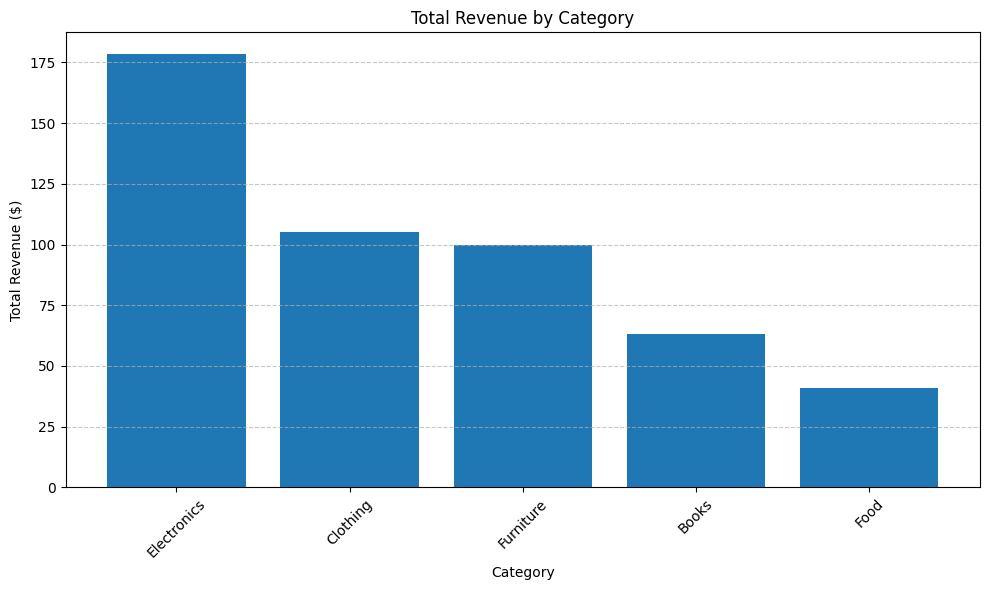

In [96]:
# Visualize the revenue by category
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_category['category'], revenue_by_category['total_revenue'])
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. Filtering on Aggregations

We can filter data based on aggregated results using various approaches in pandas.

In [97]:
# Method 1: Filter groups after aggregation
# Get categories with average price > 25
high_avg_price = sales_df.groupby('category')['price'].mean()
high_avg_price_categories = high_avg_price[high_avg_price < 25].reset_index()
print("Categories with high average price (> $25):")
high_avg_price_categories

Categories with high average price (> $25):


,category,price
0,Books,15.75
1,Food,10.25


In [98]:
# Method 2: Get all items from categories with high average prices
premium_category_names = high_avg_price_categories['category'].tolist()
sales_in_high_categories = sales_df[sales_df['category'].isin(premium_category_names)]
print("Sales in high-priced categories:")
sales_in_high_categories

Sales in high-priced categories:


,order_id,customer_id,product_id,quantity,price,order_date,category,total_revenue
2,3,101,3,3,15.75,2023-01-16,Books,47.25
5,6,105,3,1,15.75,2023-01-19,Books,15.75
6,7,103,4,4,10.25,2023-01-20,Food,41.00


In [99]:
# Method 3: Filter using aggregation with transform
# Find items priced higher than their category average
category_avg_price = sales_df.groupby('category')['price'].transform('mean')
above_avg_price_items = sales_df[sales_df['price'] > category_avg_price]
print("Items priced above their category average:")
above_avg_price_items

Items priced above their category average:


,order_id,customer_id,product_id,quantity,price,order_date,category,total_revenue


In [100]:
# Method 4: Filter categories with specific aggregation criteria
# Categories with more than 2 orders and total quantity > 3
category_counts = sales_df.groupby('category').agg({
    'order_id': 'count',
    'quantity': 'sum'
}).rename(columns={'order_id': 'order_count', 'quantity': 'total_quantity'})

popular_categories = category_counts[(category_counts['order_count'] > 2) & 
                                     (category_counts['total_quantity'] > 3)].reset_index()
print("Popular categories (>2 orders and >3 quantity):")
popular_categories

Popular categories (>2 orders and >3 quantity):


,category,order_count,total_quantity
0,Electronics,3,7


## 6. Left Outer Join

A left outer join returns all records from the left table and the matched records from the right table. If there is no match, NULL values are returned for the right table columns.

In [101]:
sales_df

,order_id,customer_id,product_id,quantity,price,order_date,category,total_revenue
0,1,101,1,2,25.50,2023-01-15,Electronics,51.00
1,2,102,2,1,35.00,2023-01-16,Clothing,35.00
2,3,101,3,3,15.75,2023-01-16,Books,47.25
3,4,103,1,2,25.50,2023-01-17,Electronics,51.00
4,5,104,2,1,35.00,2023-01-18,Clothing,35.00
5,6,105,3,1,15.75,2023-01-19,Books,15.75
6,7,103,4,4,10.25,2023-01-20,Food,41.00
7,8,106,5,2,50.00,2023-01-20,Furniture,100.00
8,9,102,1,3,25.50,2023-01-21,Electronics,76.50
9,10,107,2,1,35.00,2023-01-22,Clothing,35.00


In [102]:
customers_df

,customer_id,name,email,city,membership_level
0,101,Alice Brown,alice@example.com,New York,Gold
1,102,Bob Smith,bob@example.com,Los Angeles,Silver
2,103,Charlie Davis,charlie@example.com,Chicago,Gold
3,104,David Wilson,david@example.com,Houston,Bronze
4,105,Emma Johnson,emma@example.com,Phoenix,Silver
5,108,Frank Miller,frank@example.com,Philadelphia,Gold
6,109,Grace Lee,grace@example.com,San Antonio,Bronze


In [103]:
# Left join sales with customers using pandas merge
left_join = pd.merge(sales_df, customers_df, on='customer_id', how='left')
print("Left join (all sales, matching customers):")
left_join

Left join (all sales, matching customers):


,order_id,customer_id,product_id,quantity,price,order_date,category,total_revenue,name,email,city,membership_level
0,1,101,1,2,25.50,2023-01-15,Electronics,51.00,Alice Brown,alice@example.com,New York,Gold
1,2,102,2,1,35.00,2023-01-16,Clothing,35.00,Bob Smith,bob@example.com,Los Angeles,Silver
2,3,101,3,3,15.75,2023-01-16,Books,47.25,Alice Brown,alice@example.com,New York,Gold
3,4,103,1,2,25.50,2023-01-17,Electronics,51.00,Charlie Davis,charlie@example.com,Chicago,Gold
4,5,104,2,1,35.00,2023-01-18,Clothing,35.00,David Wilson,david@example.com,Houston,Bronze
5,6,105,3,1,15.75,2023-01-19,Books,15.75,Emma Johnson,emma@example.com,Phoenix,Silver
6,7,103,4,4,10.25,2023-01-20,Food,41.00,Charlie Davis,charlie@example.com,Chicago,Gold
7,8,106,5,2,50.00,2023-01-20,Furniture,100.00,NaN,NaN,NaN,NaN
8,9,102,1,3,25.50,2023-01-21,Electronics,76.50,Bob Smith,bob@example.com,Los Angeles,Silver
9,10,107,2,1,35.00,2023-01-22,Clothing,35.00,NaN,NaN,NaN,NaN


In this left join, all sales records are included regardless of whether there's a matching customer. Notice that some rows have NaN values for customer information because customers 106 and 107 are not in the customers table.

## 7. Right Outer Join

A right outer join returns all records from the right table and the matched records from the left table. If there is no match, NULL values are returned for the left table columns.

In [104]:
# Right join sales with customers
right_join = pd.merge(sales_df, customers_df, on='customer_id', how='right')
print("Right join (all customers, matching sales):")
right_join

Right join (all customers, matching sales):


,order_id,customer_id,product_id,quantity,price,order_date,category,total_revenue,name,email,city,membership_level
0,1.0,101,1.0,2.0,25.50,2023-01-15,Electronics,51.00,Alice Brown,alice@example.com,New York,Gold
1,3.0,101,3.0,3.0,15.75,2023-01-16,Books,47.25,Alice Brown,alice@example.com,New York,Gold
2,2.0,102,2.0,1.0,35.00,2023-01-16,Clothing,35.00,Bob Smith,bob@example.com,Los Angeles,Silver
3,9.0,102,1.0,3.0,25.50,2023-01-21,Electronics,76.50,Bob Smith,bob@example.com,Los Angeles,Silver
4,4.0,103,1.0,2.0,25.50,2023-01-17,Electronics,51.00,Charlie Davis,charlie@example.com,Chicago,Gold
5,7.0,103,4.0,4.0,10.25,2023-01-20,Food,41.00,Charlie Davis,charlie@example.com,Chicago,Gold
6,5.0,104,2.0,1.0,35.00,2023-01-18,Clothing,35.00,David Wilson,david@example.com,Houston,Bronze
7,6.0,105,3.0,1.0,15.75,2023-01-19,Books,15.75,Emma Johnson,emma@example.com,Phoenix,Silver
8,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,Frank Miller,frank@example.com,Philadelphia,Gold
9,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,Grace Lee,grace@example.com,San Antonio,Bronze


In this right join, all customer records are included regardless of whether they have any sales. Notice that customers 108 and 109 appear in the results with NaN values for sales information because they haven't made any purchases.

## 8. Inner Join

An inner join returns only the records that have matching values in both tables.

In [105]:
# Inner join sales with customers
inner_join = pd.merge(sales_df, customers_df, on='customer_id', how='inner')
print("Inner join (only matching records):")
inner_join

Inner join (only matching records):


,order_id,customer_id,product_id,quantity,price,order_date,category,total_revenue,name,email,city,membership_level
0,1,101,1,2,25.50,2023-01-15,Electronics,51.00,Alice Brown,alice@example.com,New York,Gold
1,2,102,2,1,35.00,2023-01-16,Clothing,35.00,Bob Smith,bob@example.com,Los Angeles,Silver
2,3,101,3,3,15.75,2023-01-16,Books,47.25,Alice Brown,alice@example.com,New York,Gold
3,4,103,1,2,25.50,2023-01-17,Electronics,51.00,Charlie Davis,charlie@example.com,Chicago,Gold
4,5,104,2,1,35.00,2023-01-18,Clothing,35.00,David Wilson,david@example.com,Houston,Bronze
5,6,105,3,1,15.75,2023-01-19,Books,15.75,Emma Johnson,emma@example.com,Phoenix,Silver
6,7,103,4,4,10.25,2023-01-20,Food,41.00,Charlie Davis,charlie@example.com,Chicago,Gold
7,9,102,1,3,25.50,2023-01-21,Electronics,76.50,Bob Smith,bob@example.com,Los Angeles,Silver


In this inner join, only records with matching customer IDs in both tables are included. The orders from customers 106 and 107 are excluded because those customers aren't in the customers table, and customers 108 and 109 are excluded because they don't have any orders.

## Bonus: Advanced Analysis with Joins and Aggregations

Let's combine what we've learned to perform a more complex analysis that uses joins and aggregations together.

In [106]:
# Find the total spending by membership level
# First, create a revenue column
sales_df['revenue'] = sales_df['price'] * sales_df['quantity']

# Join sales and customers
sales_customers = pd.merge(sales_df, customers_df, on='customer_id', how='inner')

# Group by membership level and aggregate
membership_analysis = sales_customers.groupby('membership_level').agg(
    customer_count=('customer_id', 'nunique'),
    order_count=('order_id', 'count'),
    total_spent=('revenue', 'sum'),
    avg_order_value=('revenue', 'mean')
).sort_values('total_spent', ascending=False)

# Calculate average spent per customer
membership_analysis['avg_spent_per_customer'] = membership_analysis['total_spent'] / membership_analysis['customer_count']

print("Spending analysis by membership level:")
membership_analysis

Spending analysis by membership level:


,customer_count,order_count,total_spent,avg_order_value,avg_spent_per_customer
membership_level,,,,,
Gold,2,4,190.25,47.562500,95.125
Silver,2,3,127.25,42.416667,63.625
Bronze,1,1,35.00,35.000000,35.000


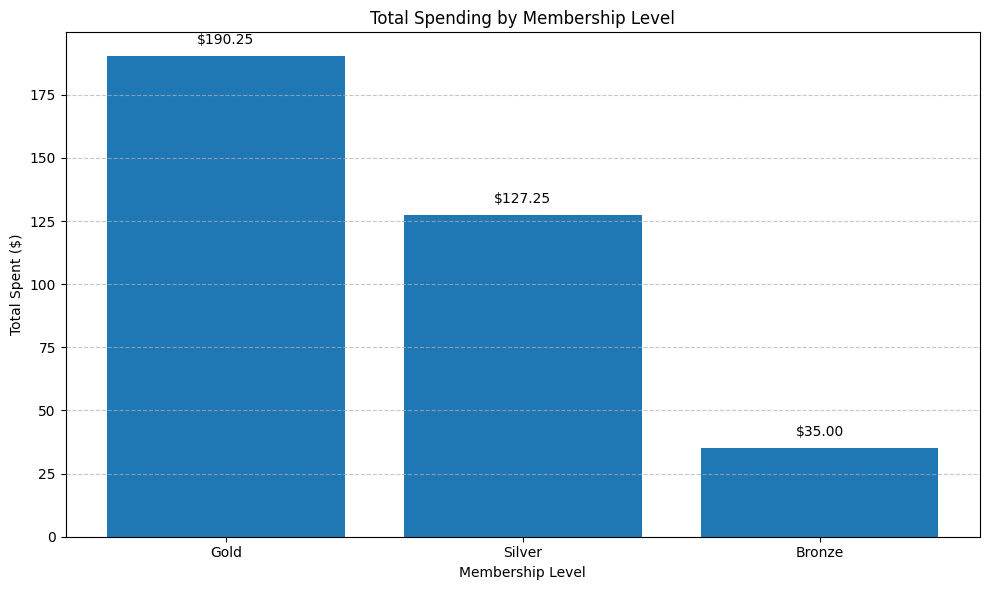

In [107]:
# Visualize the total spending by membership level
plt.figure(figsize=(10, 6))
plt.bar(membership_analysis.index, membership_analysis['total_spent'])
plt.title('Total Spending by Membership Level')
plt.xlabel('Membership Level')
plt.ylabel('Total Spent ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for i, v in enumerate(membership_analysis['total_spent']):
    plt.text(i, v + 5, f'${v:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [108]:
# Find top customers by total spending
top_customers = sales_customers.groupby(['customer_id', 'name', 'membership_level']).agg(
    order_count=('order_id', 'count'),
    total_spent=('revenue', 'sum')
).reset_index().sort_values('total_spent', ascending=False)

print("Top customers by total spending:")
top_customers

Top customers by total spending:


,customer_id,name,membership_level,order_count,total_spent
1,102,Bob Smith,Silver,2,111.50
0,101,Alice Brown,Gold,2,98.25
2,103,Charlie Davis,Gold,2,92.00
3,104,David Wilson,Bronze,1,35.00
4,105,Emma Johnson,Silver,1,15.75


In [109]:
# Find categories most popular with Gold members
gold_member_purchases = sales_customers[sales_customers['membership_level'] == 'Gold']
gold_member_categories = gold_member_purchases.groupby('category').agg(
    order_count=('order_id', 'count'),
    total_quantity=('quantity', 'sum'),
    total_spent=('revenue', 'sum')
).reset_index().sort_values('total_spent', ascending=False)

print("Categories popular with Gold members:")
gold_member_categories

Categories popular with Gold members:


,category,order_count,total_quantity,total_spent
1,Electronics,2,4,102.00
0,Books,1,3,47.25
2,Food,1,4,41.00


## Conclusion

In this notebook, we've demonstrated how to use pandas to perform various data operations:

1. Reading CSV data into pandas
2. Selecting columns in different ways
3. Filtering by values in columns
4. Performing aggregations and summaries
5. Filtering based on aggregation results
6. Left outer joins
7. Right outer joins
8. Inner joins
9. Advanced analysis combining joins and aggregations

Pandas provides a powerful and flexible interface for data manipulation, which makes it a popular choice for data analysis tasks.